In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('BankChurners.csv')

In [4]:
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
      dtype='object')

In [6]:
data.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Churn_Prob',
                    'Months_on_book':'Months','Total_Relationship_Count':'Relations','Dependent_count':'Dependents',
                    'Customer_Age':'Age', 'Education_Level':'Education', 'Months_Inactive_12_mon':'Inactive_Months',
                    'Contacts_Count_12_mon':'Contacts_Count', 'Total_Revolving_Bal':'Revolving_balance',
                    'Avg_Open_To_Buy':'Open_Buy_Ratio','Total_Amt_Chng_Q4_Q1':'Q4_Q1_Amt_Change','Total_Trans_Amt':'Trans_Amount',
                    'Total_Trans_Ct':'Trans_Count','Total_Ct_Chng_Q4_Q1':'Q4_Q1_Ct_Change','Avg_Utilization_Ratio':'Uti_Ratio'},inplace = True)

In [7]:
data.describe()


,CLIENTNUM,Age,Dependents,Months,Relations,Inactive_Months,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580


In [8]:
data.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


In [9]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [10]:
data.dtypes

CLIENTNUM              int64
Attrition_Flag        object
Age                    int64
Gender                object
Dependents             int64
Education             object
Marital_Status        object
Income_Category       object
Card_Category         object
Months                 int64
Relations              int64
Inactive_Months        int64
Contacts_Count         int64
Credit_Limit         float64
Revolving_balance      int64
Open_Buy_Ratio       float64
Q4_Q1_Amt_Change     float64
Trans_Amount           int64
Trans_Count            int64
Q4_Q1_Ct_Change      float64
Uti_Ratio            float64
Churn_Prob           float64
dtype: object

In [11]:
print(data['Gender'].value_counts(),data['Education'].value_counts(),data['Marital_Status'].value_counts(),data['Income_Category'].value_counts(),data['Card_Category'].value_counts())

F    5358
M    4769
Name: Gender, dtype: int64 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education, dtype: int64 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [12]:
ch_data = data[data['Attrition_Flag'] == 'Attrited Customer']
ex_data = data[data['Attrition_Flag'] == 'Existing Customer']

In [13]:
import numpy as np
def ploting (data,data1,data2,param,bar_width = 0.3):
    fig, ax0 = plt.subplots()
    x= np.arange(len(data[param].value_counts().index))
    ax0.set_title(f'{param} Comparison')
    ax0.bar(x - bar_width, data[param].value_counts().apply(lambda x: x/(data[param].count())),color='b',label='Total',width=bar_width)
    ax0.bar(x, data1[param].value_counts().apply(lambda x: x/(data1[param].count())),color='r',label='Churned',width=bar_width)
    ax0.bar(x + bar_width, data2[param].value_counts().apply(lambda x: x/(data2[param].count())),color='g',label='Existing',width=bar_width)
    ax0.set_title(param)
    ax0.set_xticks(x + bar_width/6)
    ax0.set_xticklabels(data[param].value_counts().index,rotation=45)
    ax0.legend(loc='best')
    ax0.set_ylabel('Propotional')
    ax0.set_xlabel('Label')
    plt.show()


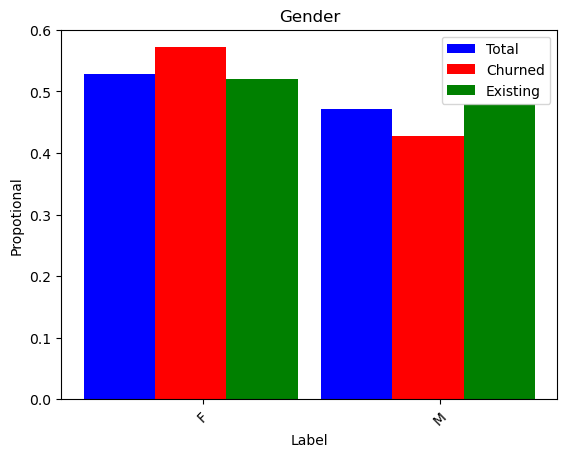

In [14]:
ploting(data,ch_data,ex_data,param='Gender')

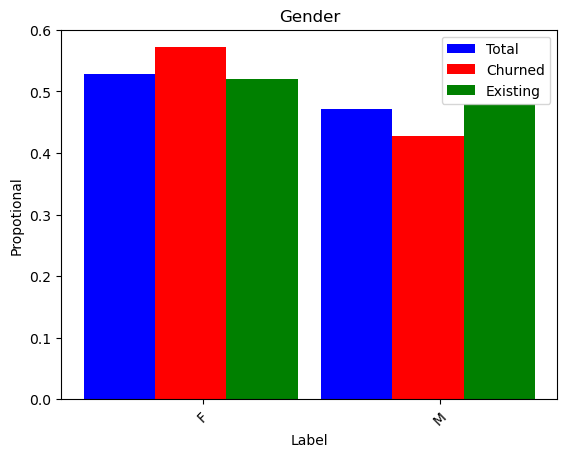

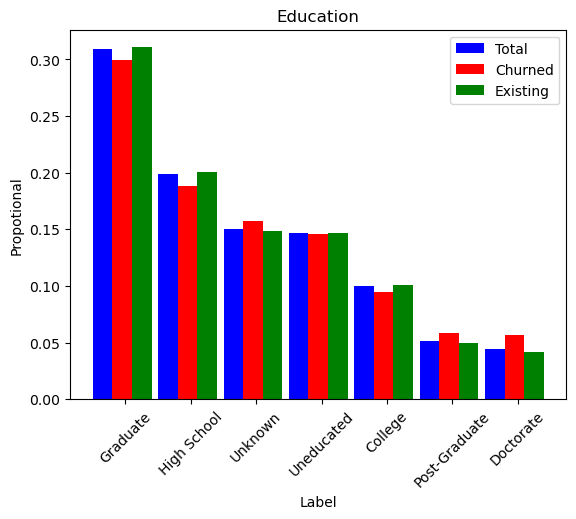

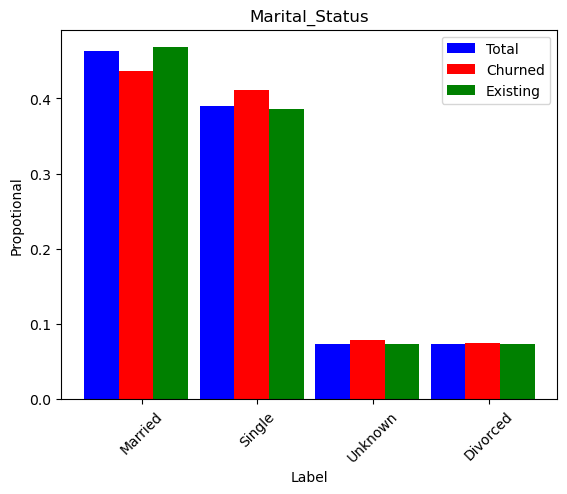

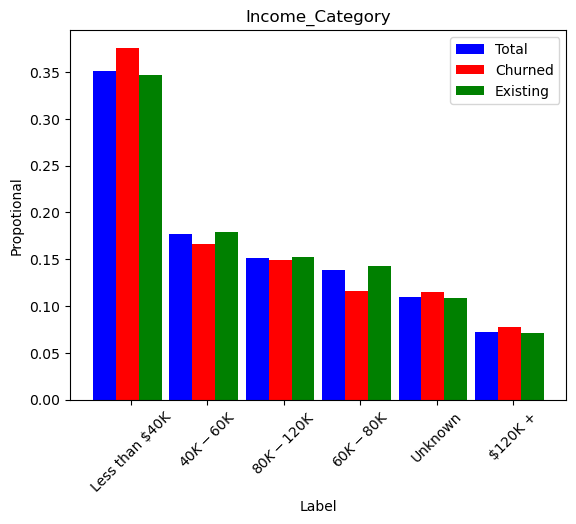

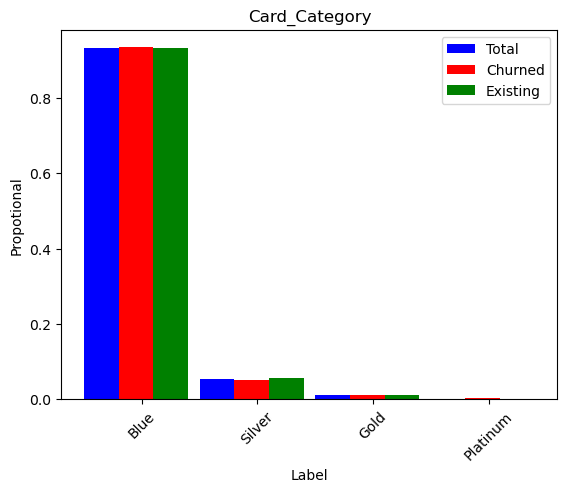

In [15]:

ob_list = ['Gender',"Education", 'Marital_Status','Income_Category','Card_Category']
for object in ob_list:
    ploting(data,ch_data,ex_data,param=object)

C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_1784\1879457217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

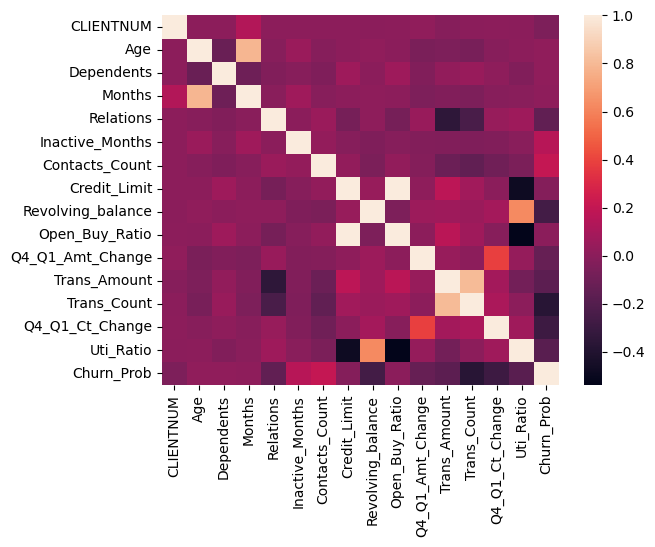

In [16]:
import seaborn as sns
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [38]:
data.drop(['Churn_Prob','CLIENTNUM'],axis=1,inplace=True)

C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_16248\420997281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

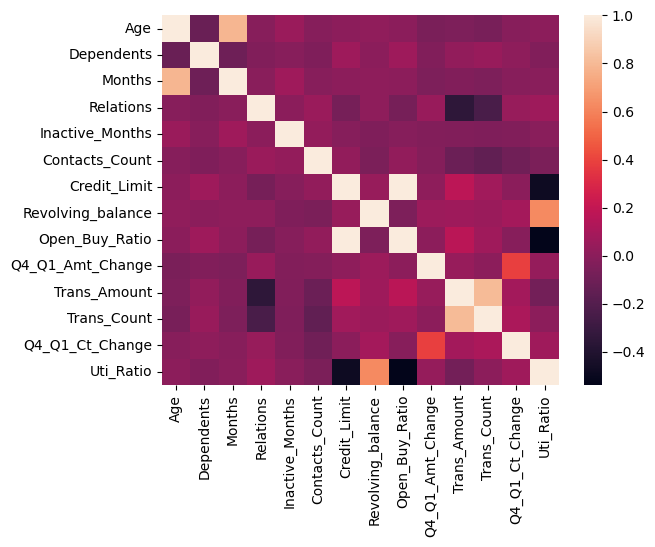

In [39]:
correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
def encode(data,label):
    data[label] = encoder.fit_transform(data[label])
    data[label].unique()
    print(data.head)

In [42]:
for object in ob_list:
    encode(data,object)
    
data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])


<bound method NDFrame.head of           Attrition_Flag  Age  Gender  Dependents    Education Marital_Status  \
0      Existing Customer   45       1           3  High School        Married   
1      Existing Customer   49       0           5     Graduate         Single   
2      Existing Customer   51       1           3     Graduate        Married   
3      Existing Customer   40       0           4  High School        Unknown   
4      Existing Customer   40       1           3   Uneducated        Married   
...                  ...  ...     ...         ...          ...            ...   
10122  Existing Customer   50       1           2     Graduate         Single   
10123  Attrited Customer   41       1           2      Unknown       Divorced   
10124  Attrited Customer   44       0           1  High School        Married   
10125  Attrited Customer   30       1           2     Graduate        Unknown   
10126  Attrited Customer   43       0           2     Graduate        Married  

In [43]:
data

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,Inactive_Months,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [63]:
data.isnull().values.any()

False

In [45]:
X = data.drop(columns = 'Attrition_Flag', axis = 1)
y = data['Attrition_Flag']

In [46]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
import time

def gettime(func):
    def func_wrapper(*args, **kwargs):
        start_time = time.time()
        result  = func(*args, **kwargs)
        opreation_time = time.time() - start_time
        print("function {} completed in - {} seconds".format(
            func.__name__,
            opreation_time))
        return result  + opreation_time
    return func_wrapper




def model_evaluation(classifier):
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    name = classifier. __class__. __name__
    print(f'The Training Accuracy of the {name} is ', accuracy_score(y_train, yt_pred))
    print(f'The Testing Accuracy of the {name} is ', accuracy_score(y_test, y_pred))
    print(f'The Roc_auc score of the {name} is ', roc_auc_score(y_test,y_pred))
    @gettime
    def timer(x):
        classifier.predict(X_train)
        return x
    time_result = timer(0)
    return [(accuracy_score(y_train, yt_pred) * 100), (accuracy_score(y_test, y_pred) * 100),
            roc_auc_score(y_test, y_pred),time_result]



In [49]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth= 9)
rfc.fit(X_train, y_train)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)




c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [50]:
knn1 = model_evaluation(knn)
dt1 = model_evaluation(dt)
lr1 = model_evaluation(lr)
rfc1 = model_evaluation(rfc)
ab1 = model_evaluation(ab)
gb1 = model_evaluation(gb)

c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

The Training Accuracy of the KNeighborsClassifier is  0.9127268238489076
The Testing Accuracy of the KNeighborsClassifier is  0.8923988153998026
The Roc_auc score of the KNeighborsClassifier is  0.7586639455936999


c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


function timer completed in - 0.2638082504272461 seconds
The Training Accuracy of the DecisionTreeClassifier is  0.9817306505369707
The Testing Accuracy of the DecisionTreeClassifier is  0.9422507403751234
The Roc_auc score of the DecisionTreeClassifier is  0.8910519145097996
function timer completed in - 0.0026700496673583984 seconds
The Training Accuracy of the LogisticRegression is  0.8892729292679916
The Testing Accuracy of the LogisticRegression is  0.8938795656465943
The Roc_auc score of the LogisticRegression is  0.723416007716023
function timer completed in - 0.0020003318786621094 seconds
The Training Accuracy of the RandomForestClassifier is  0.9786446117763239
The Testing Accuracy of the RandomForestClassifier is  0.9491609081934848
The Roc_auc score of the RandomForestClassifier is  0.8750570837904773
function timer completed in - 0.056114912033081055 seconds
The Training Accuracy of the AdaBoostClassifier is  0.961980002468831
The Testing Accuracy of the AdaBoostClassifier 

In [51]:
results = pd.DataFrame(data = [knn1, dt1, rfc1, lr1, ab1, gb1],
    columns = ['Training Accuracy', 'Testing Accuracy', 'Roc_Auc Score','Time for Prediction'],
    index = ['KNearestNeighbors', 'DecisionTreeClassifier','RandomForestClassifier','LogisticRegression', 'AdaBoostClassifier', 'GradientBoostClassifier'])

In [52]:
results

,Training Accuracy,Testing Accuracy,Roc_Auc Score,Time for Prediction
KNearestNeighbors,91.272682,89.239882,0.758664,0.263808
DecisionTreeClassifier,98.173065,94.225074,0.891052,0.002670
RandomForestClassifier,97.864461,94.916091,0.875057,0.056115
LogisticRegression,88.927293,89.387957,0.723416,0.002000
AdaBoostClassifier,96.198000,95.952616,0.914610,0.035068
GradientBoostClassifier,97.679299,96.791708,0.922231,0.012012


In [67]:

results.to_csv("o-results.csv")

C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_16248\2981160835.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(results.index,rotation=90)
C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_16248\2981160835.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(results.index,rotation=90)
C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_16248\2981160835.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(results.index,rotation=90)
C:\Users\Zaniar.J\AppData\Local\Temp\ipykernel_16248\2981160835.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(results.index,rotation=90)


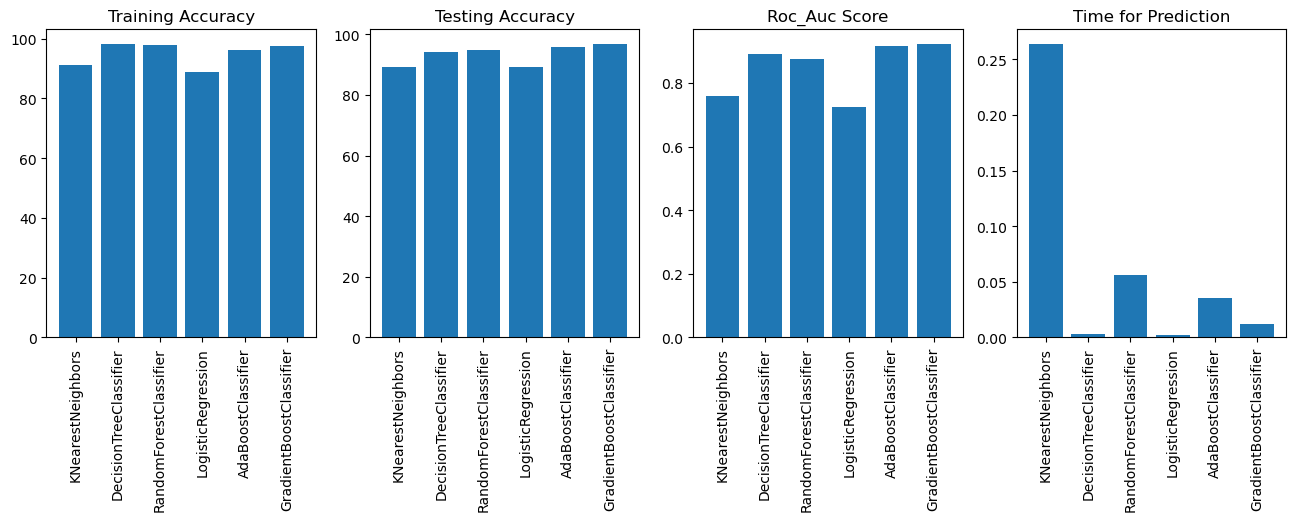

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

axes[0].bar(results.index, results['Training Accuracy'])
axes[0].set_xticklabels(results.index,rotation=90)
axes[0].set_title(results.columns[0])

axes[1].bar(results.index, results['Testing Accuracy'])
axes[1].set_xticklabels(results.index,rotation=90)
axes[1].set_title(results.columns[1])

axes[2].bar(results.index, results['Roc_Auc Score'])
axes[2].set_xticklabels(results.index,rotation=90)
axes[2].set_title(results.columns[2])

axes[3].bar(results.index, results['Time for Prediction'])
axes[3].set_xticklabels(results.index,rotation=90)
axes[3].set_title(results.columns[3])

plt.show()



In [70]:
mean_data = data.mean()
mean_data

TypeError: 'Series' object is not callable

In [56]:
std_data = data.std()
std_data

Attrition_Flag          0.367235
Age                     8.016814
Gender                  0.499178
Dependents              1.298908
Education               1.834812
Marital_Status          0.737808
Income_Category         1.504700
Card_Category           0.693039
Months                  7.986416
Relations               1.554408
Inactive_Months         1.010622
Contacts_Count          1.106225
Credit_Limit         9088.776650
Revolving_balance     814.987335
Open_Buy_Ratio       9090.685324
Q4_Q1_Amt_Change        0.219207
Trans_Amount         3397.129254
Trans_Count            23.472570
Q4_Q1_Ct_Change         0.238086
Uti_Ratio               0.275691
dtype: float64

In [74]:
data_std_mean = pd.DataFrame({'features' :mean_data.index, 'mean' :mean_data.values,"std" :std_data.values })
data_std_mean.to_csv('mean_std_data.csv')

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

col_names = ['Trans_Amount','Open_Buy_Ratio','Revolving_balance','Credit_Limit','Months','Age']

df_scaled = data.copy()

df_scaled[col_names] = scaler.fit_transform(df_scaled[col_names].values)
df_scaled

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,Inactive_Months,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio
0,1,-0.090909,1,3,3,1,2,0,0.333333,5,1,3,0.956476,-0.350175,0.988927,1.335,-1.065558,42,1.625,0.061
1,1,0.272727,0,5,2,2,4,0,0.888889,6,1,2,0.435477,-0.289123,0.459078,1.541,-1.008702,33,3.714,0.105
2,1,0.454545,1,3,2,1,3,0,0.000000,4,1,0,-0.132863,-0.895439,-0.006562,2.594,-0.778186,20,2.333,0.000
3,1,-0.545455,0,4,3,3,4,0,-0.222222,3,4,1,-0.145198,0.870877,-0.313785,1.405,-1.055115,20,2.333,0.760
4,1,-0.545455,1,3,5,1,2,0,-1.666667,5,1,0,0.019618,-0.895439,0.145527,2.175,-1.192419,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0.363636,1,2,2,2,1,0,0.444444,3,2,3,-0.064141,0.403509,-0.154901,0.703,4.477664,117,0.857,0.462
10123,0,-0.454545,1,2,6,0,1,0,-1.222222,4,2,3,-0.031953,0.638596,-0.162048,0.804,1.881648,69,0.683,0.511
10124,0,-0.181818,0,1,3,1,4,0,0.000000,5,3,4,0.101028,-0.895439,0.226727,0.819,2.472249,60,0.818,0.000
10125,0,-1.454545,1,2,2,3,1,0,0.000000,4,3,3,0.085991,-0.895439,0.211729,0.535,1.738929,62,0.722,0.000


In [58]:
X = df_scaled.drop(columns = 'Attrition_Flag', axis = 1)
y = df_scaled['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth= 9)
rfc.fit(X_train, y_train)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

knn1 = model_evaluation(knn)
dt1 = model_evaluation(dt)
lr1 = model_evaluation(lr)
rfc1 = model_evaluation(rfc)
ab1 = model_evaluation(ab)
gb1 = model_evaluation(gb)

results_scale = pd.DataFrame(data = [knn1, dt1, rfc1, lr1, ab1, gb1],
    columns = ['Training Accuracy', 'Testing Accuracy', 'Roc_Auc Score','Time for Prediction'],
    index = ['KNearestNeighbors', 'DecisionTreeClassifier','RandomForestClassifier','LogisticRegression', 'AdaBoostClassifier', 'GradientBoostClassifier'])





c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

The Training Accuracy of the KNeighborsClassifier is  0.9091470188865572
The Testing Accuracy of the KNeighborsClassifier is  0.8933859822309971
The Roc_auc score of the KNeighborsClassifier is  0.7393755283178359


c:\Users\Zaniar.J\anaconda3\envs\i6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


function timer completed in - 0.2409203052520752 seconds
The Training Accuracy of the DecisionTreeClassifier is  0.9849401308480434
The Testing Accuracy of the DecisionTreeClassifier is  0.9447186574531096
The Roc_auc score of the DecisionTreeClassifier is  0.8869840095801634
function timer completed in - 0.0020093917846679688 seconds
The Training Accuracy of the LogisticRegression is  0.9039624737686706
The Testing Accuracy of the LogisticRegression is  0.8983218163869694
The Roc_auc score of the LogisticRegression is  0.7602176669484362
function timer completed in - 0.0010025501251220703 seconds
The Training Accuracy of the RandomForestClassifier is  0.9769164300703617
The Testing Accuracy of the RandomForestClassifier is  0.9447186574531096
The Roc_auc score of the RandomForestClassifier is  0.8595625528317836
function timer completed in - 0.05728626251220703 seconds
The Training Accuracy of the AdaBoostClassifier is  0.962967534872238
The Testing Accuracy of the AdaBoostClassifier 

In [59]:
results


,Training Accuracy,Testing Accuracy,Roc_Auc Score,Time for Prediction
KNearestNeighbors,91.272682,89.239882,0.758664,0.263808
DecisionTreeClassifier,98.173065,94.225074,0.891052,0.002670
RandomForestClassifier,97.864461,94.916091,0.875057,0.056115
LogisticRegression,88.927293,89.387957,0.723416,0.002000
AdaBoostClassifier,96.198000,95.952616,0.914610,0.035068
GradientBoostClassifier,97.679299,96.791708,0.922231,0.012012


In [75]:
results_scale.to_csv('scaled_results.csv')
results_scale

,Training Accuracy,Testing Accuracy,Roc_Auc Score,Time for Prediction
KNearestNeighbors,90.914702,89.338598,0.739376,0.240920
DecisionTreeClassifier,98.494013,94.471866,0.886984,0.002009
RandomForestClassifier,97.691643,94.471866,0.859563,0.057286
LogisticRegression,90.396247,89.832182,0.760218,0.001003
AdaBoostClassifier,96.296753,95.360316,0.904232,0.037673
GradientBoostClassifier,97.580546,96.298124,0.911045,0.011019


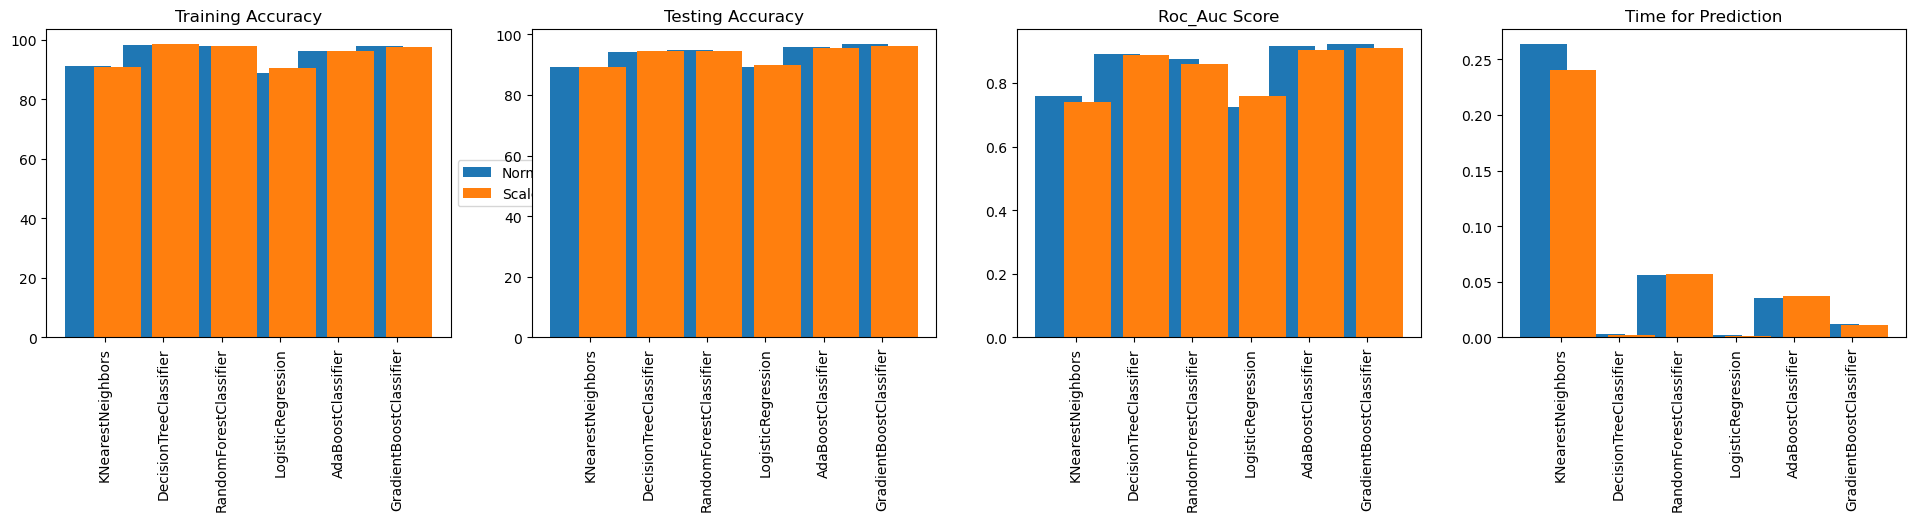

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 4))
bar_width = 0.25
x= np.arange(len(results.index))




axes[0].bar(x - bar_width, results['Training Accuracy'])
axes[0].bar(x + bar_width, results_scale['Training Accuracy'])
axes[0].set_xticks(x + bar_width/6)
axes[0].set_xticklabels(results.index,rotation=90)
axes[0].set_title(results.columns[0])

axes[1].bar(x - bar_width, results['Testing Accuracy'])
axes[1].bar(x + bar_width, results_scale['Testing Accuracy'])
axes[1].set_xticks(x + bar_width/6)
axes[1].set_xticklabels(results.index,rotation=90)
axes[1].set_title(results.columns[1])

axes[2].bar(x - bar_width, results['Roc_Auc Score'])
axes[2].bar(x + bar_width, results_scale['Roc_Auc Score'])
axes[2].set_xticks(x + bar_width/6)
axes[2].set_xticklabels(results.index,rotation=90)
axes[2].set_title(results.columns[2])

axes[3].bar(x - bar_width, results['Time for Prediction'])
axes[3].bar(x + bar_width, results_scale['Time for Prediction'])
axes[3].set_xticks(x + bar_width/6)
axes[3].set_xticklabels(results.index,rotation=90)
axes[3].set_title(results.columns[3])

axes[0].legend(['Normal','Scaled'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

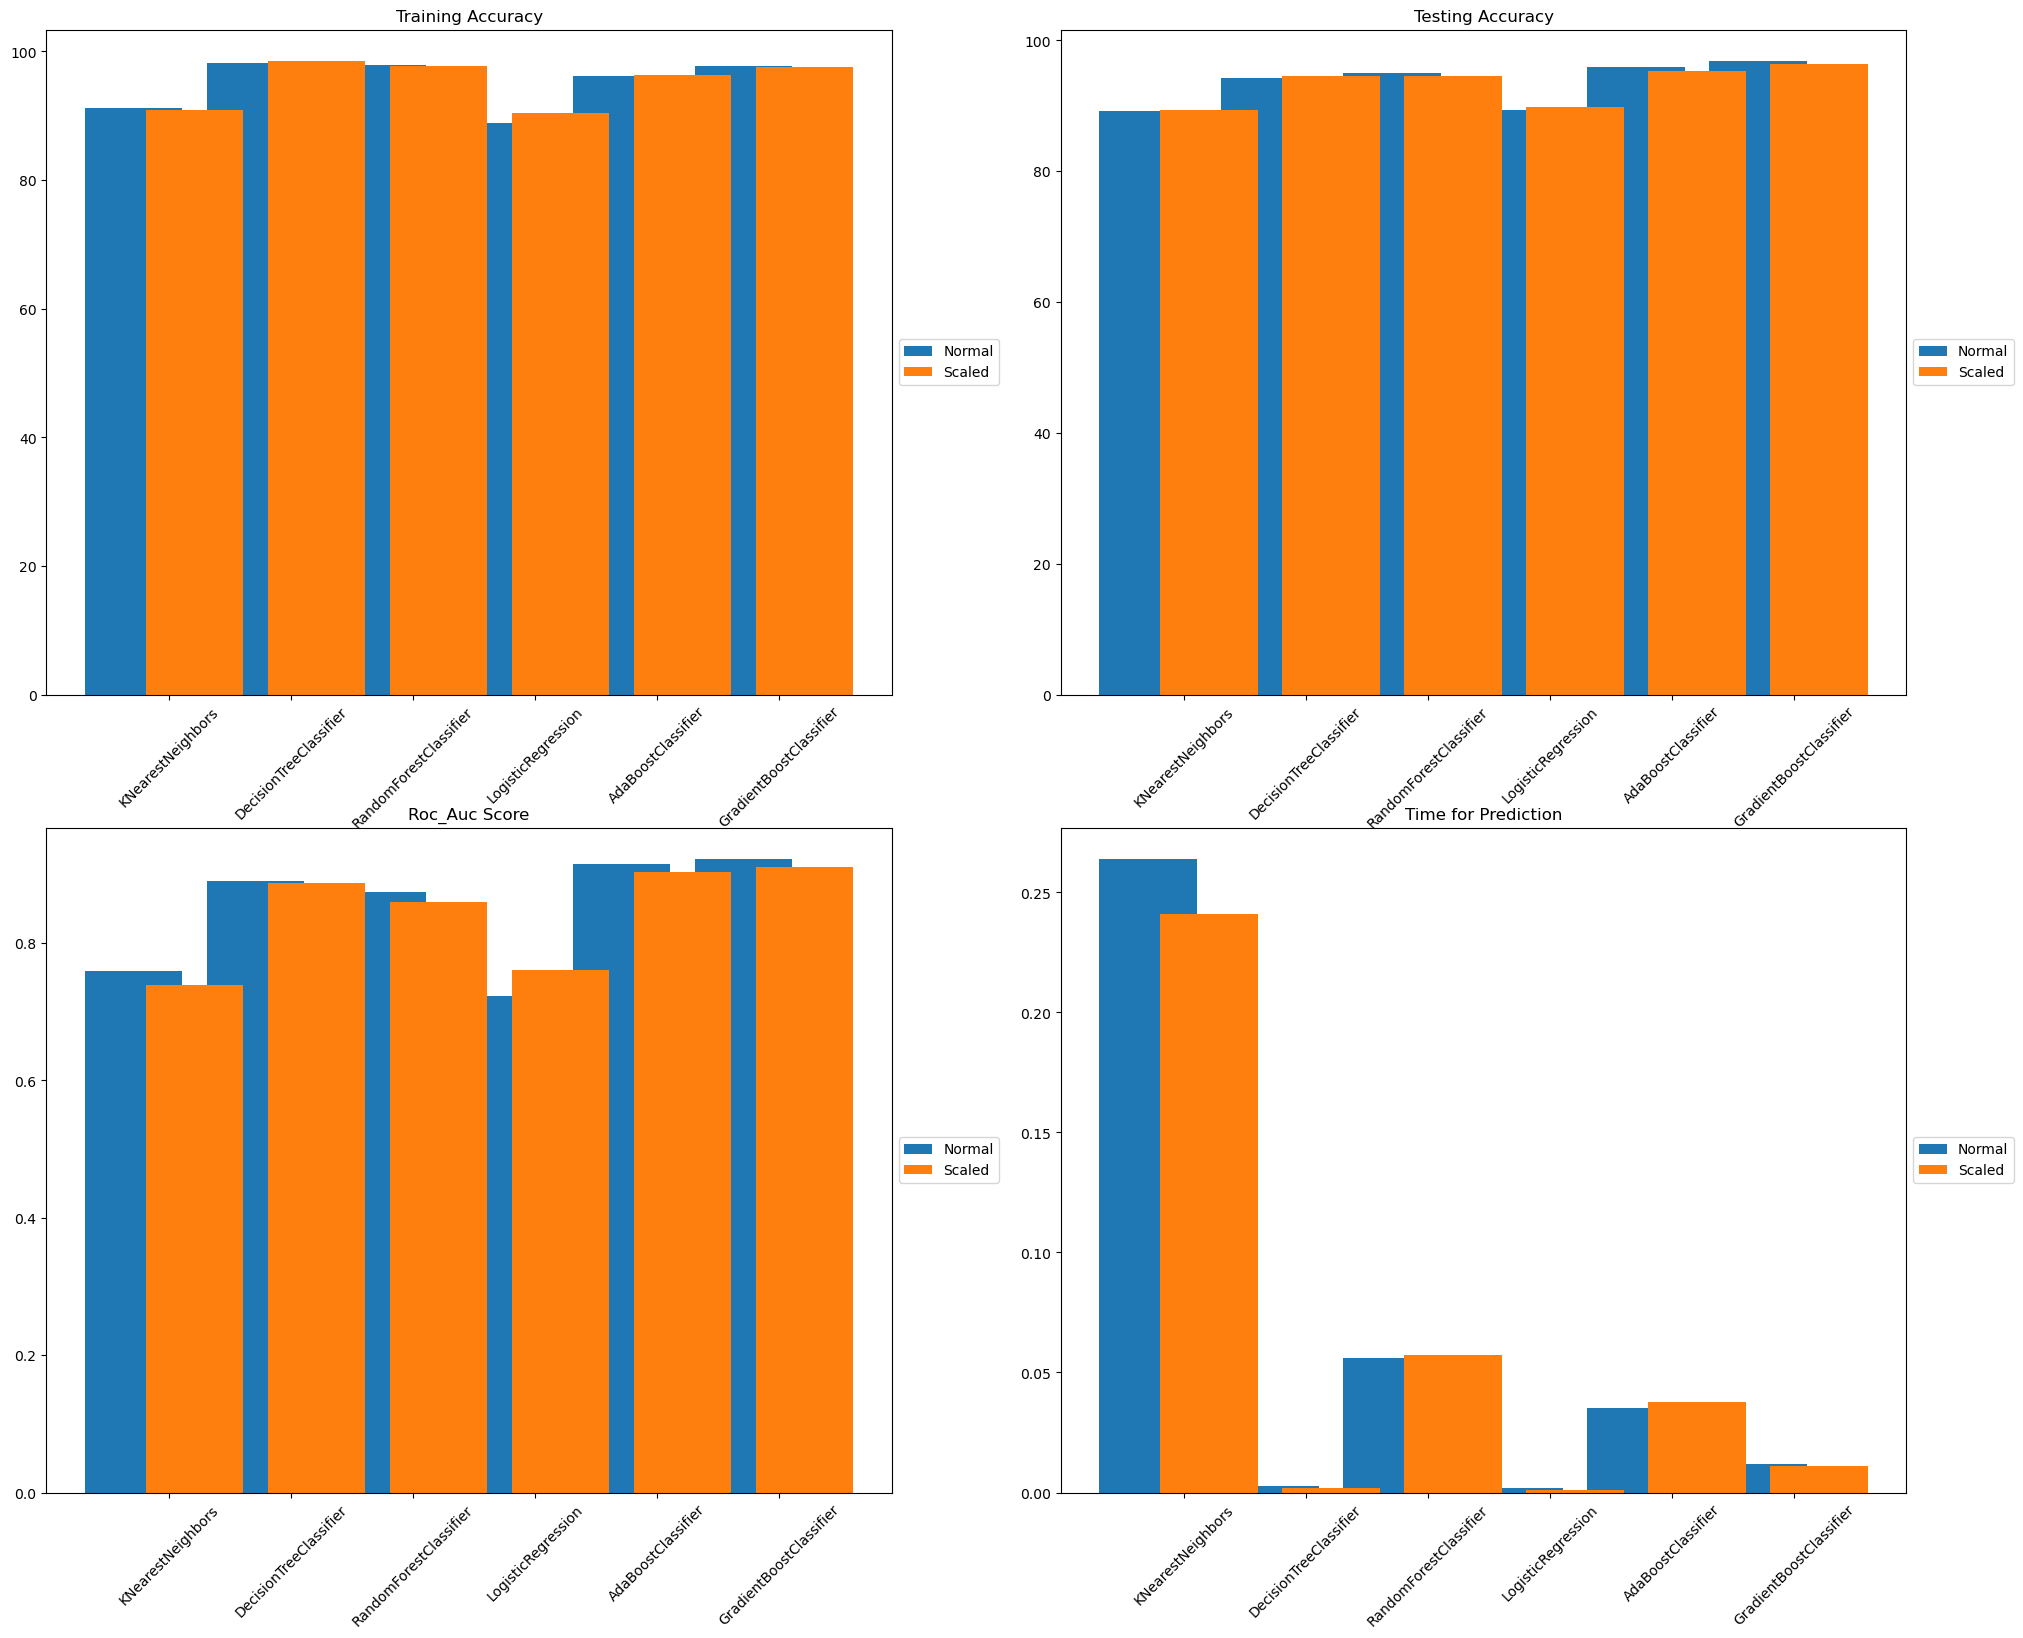

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 19))
bar_width = 0.25
x= np.arange(len(results.index))




axes[0][0].bar(x - bar_width, results['Training Accuracy'])
axes[0][0].bar(x + bar_width, results_scale['Training Accuracy'])
axes[0][0].set_xticks(x + bar_width/6)
axes[0][0].set_xticklabels(results.index,rotation=45)
axes[0][0].set_title(results.columns[0])
axes[0][0].legend(['Normal','Scaled'],loc='center left', bbox_to_anchor=(1, 0.5))

axes[0][1].bar(x - bar_width, results['Testing Accuracy'])
axes[0][1].bar(x + bar_width, results_scale['Testing Accuracy'])
axes[0][1].set_xticks(x + bar_width/6)
axes[0][1].set_xticklabels(results.index,rotation=45)
axes[0][1].set_title(results.columns[1])
axes[0][1].legend(['Normal','Scaled'],loc='center left', bbox_to_anchor=(1, 0.5))

axes[1][0].bar(x - bar_width, results['Roc_Auc Score'])
axes[1][0].bar(x + bar_width, results_scale['Roc_Auc Score'])
axes[1][0].set_xticks(x + bar_width/6)
axes[1][0].set_xticklabels(results.index,rotation=45)
axes[1][0].set_title(results.columns[2])
axes[1][0].legend(['Normal','Scaled'],loc='center left', bbox_to_anchor=(1, 0.5))

axes[1][1].bar(x - bar_width, results['Time for Prediction'])
axes[1][1].bar(x + bar_width, results_scale['Time for Prediction'])
axes[1][1].set_xticks(x + bar_width/6)
axes[1][1].set_xticklabels(results.index,rotation=45)
axes[1][1].set_title(results.columns[3])
axes[1][1].legend(['Normal','Scaled'],loc='center left', bbox_to_anchor=(1, 0.5))



plt.show()
